In [1]:
from sklearn.datasets import load_iris

iris_dataset = load_iris()
iris_dataset.DESCR

'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ============

In [2]:
dataset = iris_dataset.data
print(dataset)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [3]:
from sklearn.model_selection import train_test_split

y = iris_dataset.target
X_train, X_test, y_train, y_test = train_test_split(dataset, y, test_size = 0.3, random_state = 0)
print(len(y_test))
print(len(y_train))

45
105


In [4]:
import numpy as np
from numpy import nan

X_train = ([[nan, 0, 3],
           [3, 7, 9],
           [3, 5, 2],
           [4, nan, 6],
           [8, 8, 1]])
X_test = ([[14, 15, -1],
          [nan, 8, -5]])

In [5]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy = "median")
imputer.fit(X_train)
print(imputer.statistics_)

[3.5 6.  3. ]


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
X_train_fixed = imputer.transform(X_train)
print(X_train_fixed)

[[3.5 0.  3. ]
 [3.  7.  9. ]
 [3.  5.  2. ]
 [4.  6.  6. ]
 [8.  8.  1. ]]


In [8]:
X_test_fixed = imputer.transform(X_test)
print(X_test_fixed)

[[14.  15.  -1. ]
 [ 3.5  8.  -5. ]]


In [9]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(X_train_fixed)
print(mms.scale_)#max - min
print(mms.min_)

[0.2   0.125 0.125]
[-0.6    0.    -0.125]


In [10]:
X_train_scaled = mms.transform(X_train_fixed)
print(X_train_scaled)

[[0.1   0.    0.25 ]
 [0.    0.875 1.   ]
 [0.    0.625 0.125]
 [0.2   0.75  0.625]
 [1.    1.    0.   ]]


In [11]:
X_test_scaled = mms.transform(X_test_fixed)
print(X_test_scaled)

[[ 2.2    1.875 -0.25 ]
 [ 0.1    1.    -0.75 ]]


In [12]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
stdsc = stdsc.fit(X_train_fixed)
X_train_std = stdsc.transform(X_train_fixed)
X_test_std = stdsc.transform(X_test_fixed)
print(X_train_std)
print(X_test_std)

[[-0.42399915 -1.86669121 -0.41015156]
 [-0.68899862  0.64616234  1.64060622]
 [-0.68899862 -0.07179582 -0.75194452]
 [-0.15899968  0.28718326  0.61522733]
 [ 1.96099608  1.00514142 -1.09373748]]
[[ 5.14098972  3.51799498 -1.77732341]
 [-0.42399915  1.00514142 -3.14449526]]


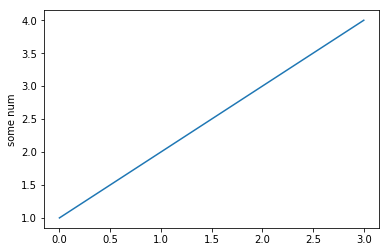

In [13]:
plt.plot([1, 2, 3, 4])
plt.ylabel('some num')
plt.show()

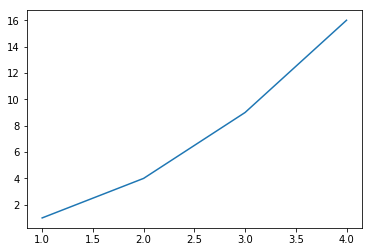

In [14]:
plt.plot([1,2,3,4],[1,4,9,16])
plt.show()

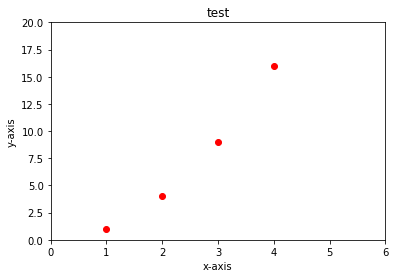

In [15]:
plt.plot([1,2,3,4],[1,4,9,16], 'ro')
plt.axis([0, 6, 0, 20])
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('test')
plt.show()

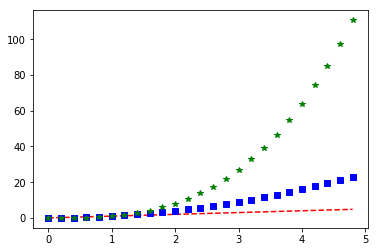

In [16]:
t = np.arange(0., 5., 0.2)
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g*')
plt.show()

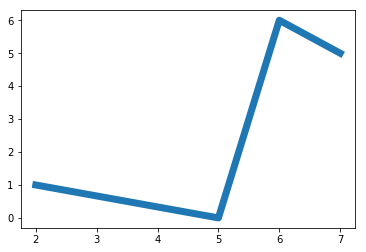

In [32]:
x = [2, 5, 6, 7]
y = [1, 0, 6, 5]
plt.plot(x, y, linewidth=7.0)

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


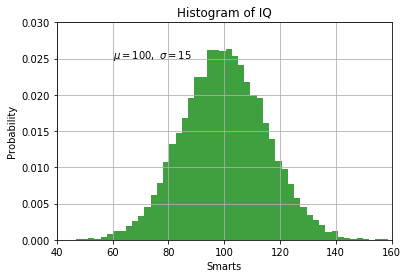

In [36]:
np.random.seed(1969)
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
#n, bins, patches = plt.hist(x, 50, normed=1, facecolor='g', alpha=0.75)
plt.hist(x, 50, normed=1, facecolor='g', alpha=0.75)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

In [20]:
reviews = pd.read_csv('winemag-data_first150k.csv', index_col = 0)
reviews.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


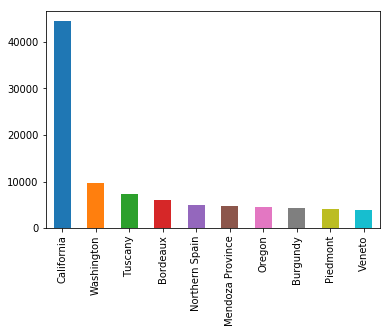

In [21]:
reviews['province'].value_counts().head(10).plot.bar();

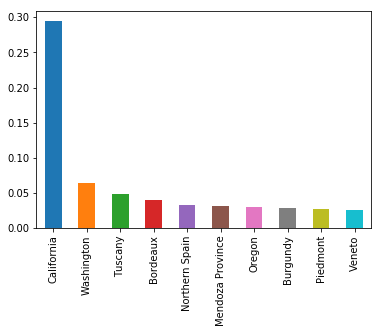

In [22]:
(reviews['province'].value_counts().head(10) / len(reviews)).plot.bar();

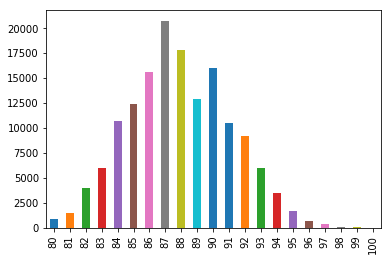

In [23]:
reviews['points'].value_counts().sort_index().plot.bar();

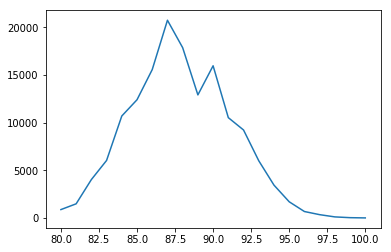

In [25]:
reviews['points'].value_counts().sort_index().plot.line()

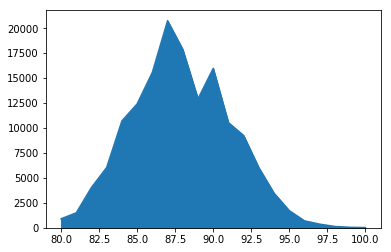

In [26]:
reviews['points'].value_counts().sort_index().plot.area()

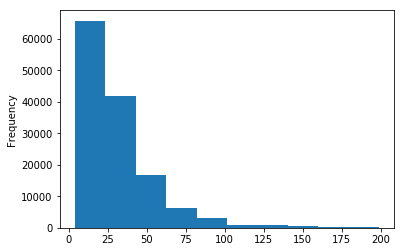

In [27]:
reviews[(reviews['price'] < 200)]['price'].plot.hist()

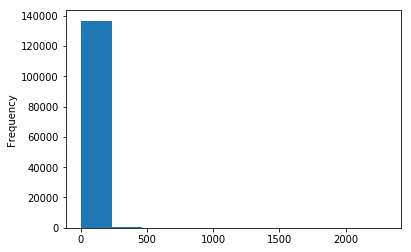

In [28]:
reviews['price'].plot.hist()

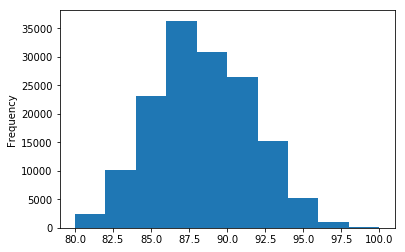

In [29]:
reviews['points'].plot.hist()

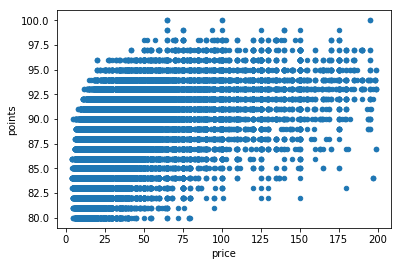

In [30]:
reviews[reviews['price'] < 200].plot.scatter(x = 'price', y = 'points')

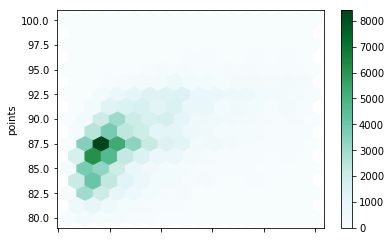

In [31]:
reviews[reviews['price'] < 100].plot.hexbin(x='price', y='points', gridsize=15)